# LetsGrowMore #January 2022

# Author :- Ashwini V.Vikhe


# Task 1: Stock Market Prediction And Forecasting Using Stacked LSTM 


Level :- Beginner

Language :- Python

Software :- Jupyter Notebook

Dataset Link :- https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

## Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# Reading the Dataset

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
df.shape

(2035, 8)

# Data Sorting

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
print(type(df.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
data=df.sort_values(by='Date')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# Visualization

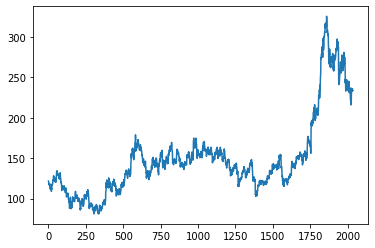

In [ ]:
plt.plot(data['Close'])

In [ ]:
dff=data['Close']
dff

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

# Min Max Scaler

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
dff

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# Spliting the Dataset


In [ ]:
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]

# Convert an array of values into a dataset matrix

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Spliting Data into Train and Test

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_split=0.1,epochs=78,batch_size=64,verbose=1)

Epoch 1/78
19/19 [==============================] - 18s 268ms/step - loss: 0.0099 - val_loss: 0.0012
Epoch 2/78
19/19 [==============================] - 4s 196ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 3/78
19/19 [==============================] - 4s 195ms/step - loss: 9.0812e-04 - val_loss: 0.0012
Epoch 4/78
19/19 [==============================] - 4s 197ms/step - loss: 8.1321e-04 - val_loss: 0.0011
Epoch 5/78
19/19 [==============================] - 4s 196ms/step - loss: 7.9004e-04 - val_loss: 0.0010
Epoch 6/78
19/19 [==============================] - 4s 194ms/step - loss: 7.7580e-04 - val_loss: 0.0011
Epoch 7/78
19/19 [==============================] - 4s 200ms/step - loss: 7.4217e-04 - val_loss: 0.0011
Epoch 8/78
19/19 [==============================] - 4s 197ms/step - loss: 7.4593e-04 - val_loss: 9.1673e-04
Epoch 9/78
19/19 [==============================] - 4s 199ms/step - loss: 7.0214e-04 - val_loss: 8.7743e-04
Epoch 10/78
19/19 [==============================] - 4s 205ms/s

# Prediction and Checking Performance

In [ ]:
test_predict=model.predict(X_test)

In [ ]:
test_predicted=scaler.inverse_transform(test_predict)
test_predicted

array([[139.97253 ],
       [140.04524 ],
       [138.5934  ],
       [135.05472 ],
       [134.11113 ],
       [134.4379  ],
       [136.55817 ],
       [138.17111 ],
       [137.61018 ],
       [136.61928 ],
       [136.49371 ],
       [138.60092 ],
       [139.26994 ],
       [141.1436  ],
       [143.61812 ],
       [139.23589 ],
       [136.55426 ],
       [137.70338 ],
       [139.17238 ],
       [146.43036 ],
       [150.1489  ],
       [150.33925 ],
       [149.40375 ],
       [146.29245 ],
       [147.5693  ],
       [147.7947  ],
       [148.54141 ],
       [150.8016  ],
       [150.7878  ],
       [150.12845 ],
       [150.69324 ],
       [148.77765 ],
       [144.50351 ],
       [137.82253 ],
       [136.02013 ],
       [136.71275 ],
       [137.39082 ],
       [135.69386 ],
       [132.26309 ],
       [127.85771 ],
       [126.14618 ],
       [125.95458 ],
       [123.5559  ],
       [123.27963 ],
       [120.72437 ],
       [117.77704 ],
       [118.07461 ],
       [118.1

# Calculating performance

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance

0.056961977882496906